Входные данные - персональные данные о некоторых клиентах, информация об их тарифах и договорах.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

# Исследовательский анализ данных

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report

Информация о договоре:

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')

In [3]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Персональные данные клиента:

In [5]:
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')

In [6]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Информация об интернет-услугах:

In [8]:
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')

In [9]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


Информация об услугах телефонии:

In [11]:
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [12]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [13]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


Соединим данные из разных источников в одну таблицу:

In [14]:
df = df_contract.merge(df_personal, on='customerID', how='left')

In [15]:
df = df.merge(df_internet, on='customerID', how='left')

In [16]:
df = df.merge(df_phone, on='customerID', how='left')

In [17]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
MultipleLines       6361 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


В объединенных данных появились пропуски, т.к. среди клиентов есть те, кто пользуется интернетом и не пользуется телефоном, и наоборот. Для того, чтобы не искажать и не потерять значительную часть данных, проведем техническое заполнение. Отсутствие услуги заполним как 'No service':

In [19]:
df.fillna('No service', inplace=True)

In [20]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No service
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No service
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


Изменим тип данных для значений даты и времени:

In [22]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')

In [23]:
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

Посмотрим максимальные и минимальные значения:

In [24]:
df['BeginDate'].min(), df['BeginDate'].max()

(Timestamp('2013-10-01 00:00:00'), Timestamp('2020-02-01 00:00:00'))

In [25]:
df['EndDate'].min(), df['EndDate'].max()

(Timestamp('2019-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

Изменим тип данных на количественный:

In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [27]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No service
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No service
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             1869 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(

Количественные признаки не удалось преобразовать методом astype, скорее всего были строковые значения ' '. Посмотрим на пропуски:

In [29]:
df.query('TotalCharges.isna()')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No service
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,No service,No service,No service,No service,No service,No service,No service,No
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,Yes
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No service
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,No
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,Yes
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,No
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,No
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


Отфильтруем юзеров, которые начали пользоваться услугами компании в феврале 2020:

In [30]:
df.query('BeginDate == "2020-02-01"')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No service
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,No service,No service,No service,No service,No service,No service,No service,No
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,Yes
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No service
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,No
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,Yes
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,No
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,No service,No service,No service,No service,No service,No service,No service,No
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


Все клиенты из данного среза пришли в компанию в феврале 2020. Т.к. выгрузка актуальна на 1 февраля 2020, общий платеж по этим клиентам скорее всего ещё не размечен системой. В таком случае заполним пропуски ежемесячным платежом:

In [31]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])

Изменим тип данных на категориальный:

In [32]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

Приведем данные к одному виду и заменим 1/0 на Yes/No:

In [33]:
df.replace({'SeniorCitizen': {0:'No', 1:'Yes'}}, inplace=True)

Посмотрим, что получилось:

In [34]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,No service
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,No service
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             1869 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
dtypes: datetime64[ns](2), float64(2), object(16)
memor

Получим числовое описание данных:

In [36]:
df.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.798992
std,30.090047,2266.730170
min,18.250000,18.800000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


Посмотрим уникальные значения в строках:

In [37]:
df['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [38]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [39]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [40]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [41]:
df['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [42]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [43]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [44]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No service     1526
Name: InternetService, dtype: int64

In [45]:
df['OnlineSecurity'].value_counts()

No            3498
Yes           2019
No service    1526
Name: OnlineSecurity, dtype: int64

In [46]:
df['OnlineBackup'].value_counts()

No            3088
Yes           2429
No service    1526
Name: OnlineBackup, dtype: int64

In [47]:
df['DeviceProtection'].value_counts()

No            3095
Yes           2422
No service    1526
Name: DeviceProtection, dtype: int64

In [48]:
df['TechSupport'].value_counts()

No            3473
Yes           2044
No service    1526
Name: TechSupport, dtype: int64

In [49]:
df['StreamingTV'].value_counts()

No            2810
Yes           2707
No service    1526
Name: StreamingTV, dtype: int64

In [50]:
df['StreamingMovies'].value_counts()

No            2785
Yes           2732
No service    1526
Name: StreamingMovies, dtype: int64

In [51]:
df['MultipleLines'].value_counts()

No            3390
Yes           2971
No service     682
Name: MultipleLines, dtype: int64

Проверим данные на наличие дубликатов:

In [52]:
df.duplicated().sum()

0

Создадим дополнительную фичу - срок "жизни" клиента. Т.к. максимальная дата ухода - январь 2020, пропуски можно заполнить актуальной датой и в дальнейшем считать, что актуальная дата в столбце 'EndDate' не является уходом клиента:

In [53]:
df['EndDate'].fillna(datetime.datetime(2020, 2, 1), inplace=True)

In [54]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,No service
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,No service
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
dtypes: datetime64[ns](2), float64(2), object(16)
memor

Создадим фичу как разницу между актуальной датой/датой ухода клиента и датой заключения контракта в днях:

In [56]:
df['total_days'] = (df['EndDate'] - df['BeginDate']).dt.days

In [57]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,total_days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,No,...,No,DSL,No,Yes,No,No,No,No,No service,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,No,...,No,DSL,Yes,No,Yes,No,No,No,No,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,...,No,DSL,Yes,Yes,No,No,No,No,No,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,No,...,No,DSL,Yes,No,Yes,Yes,No,No,No service,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,...,No,Fiber optic,No,No,No,No,No,No,No,61


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
total_days          7043 non-null int64
dtypes: datetim

Проверим мультиколлинеарность признаков:

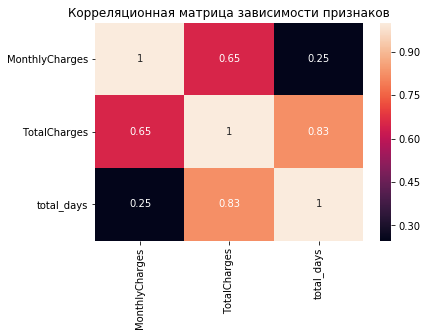

In [59]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.title('Корреляционная матрица зависимости признаков')
plt.show()

Создадим таргет:

In [60]:
df['target'] = (df['EndDate'] != '2020-02-01') * 1

In [61]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,total_days,target
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,No,...,DSL,No,Yes,No,No,No,No,No service,31,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,No,...,DSL,Yes,No,Yes,No,No,No,No,1036,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,...,DSL,Yes,Yes,No,No,No,No,No,61,1
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,No,...,DSL,Yes,No,Yes,Yes,No,No,No service,1371,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,...,Fiber optic,No,No,No,No,No,No,No,61,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
total_days          7043 non-null int64
target         

Посмотрим баланс классов:

In [63]:
df['target'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: target, dtype: float64

**Вывод:**

Провели замену типов данных и техническое заполнение пропусков значением 'No service' в случаях, когда клиент не использует одну из услуг.

Пропуски по общим платежам заполнены значениями текущих платежей, т.к. эти пропуски есть только у тех клиентов, которые пришли в феврале 2020 и совершили один ежемесячный платеж соответственно. 

Аномалий и дубликатов в данных нет.

Классы не сбалансированны.

Высокая корреляционная зависимость между общим платежом по клиенту и общим сроком "жизни" клиента, при обучении моделей будем использовать только дополнительную фичу. Чтобы не допустить утечки целевого признака при обучении моделей не будем использовать даты заключения и расторжения договора. Код клиента не несет информативной нагрузки и к признакам так же не относится.

# Подготовка обучающих данных

Разделим данные на обучающую, валидационную и тестовую выборки в соотношении 60:20:20:

In [64]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

In [65]:
train, valid = train_test_split(train, test_size=0.25, random_state=42, stratify=train['target'])

Проверим размеры данных и баланс классов:

In [66]:
train.shape, valid.shape, test.shape

((4225, 22), (1409, 22), (1409, 22))

In [67]:
train['target'].value_counts(normalize=True)

0    0.734675
1    0.265325
Name: target, dtype: float64

In [68]:
valid['target'].value_counts(normalize=True)

0    0.734564
1    0.265436
Name: target, dtype: float64

In [69]:
test['target'].value_counts(normalize=True)

0    0.734564
1    0.265436
Name: target, dtype: float64

Определим признаки и целелевой признак:

In [70]:
features_train = train.drop(['customerID', 'BeginDate', 'EndDate', 'TotalCharges', 'target'], axis=1)

In [71]:
features_valid = valid.drop(['customerID', 'BeginDate', 'EndDate', 'TotalCharges', 'target'], axis=1)

In [72]:
features_test = test.drop(['customerID', 'BeginDate', 'EndDate', 'TotalCharges', 'target'], axis=1)

In [73]:
target_train = train['target']

In [74]:
target_valid = valid['target']

In [75]:
target_test = test['target']

Определим категориальные признаки:

In [76]:
cat_features = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender','SeniorCitizen',
                'Partner', 'Dependents', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'MultipleLines']

Определим количественные признаки и масштабируем их:

In [77]:
numeric = ['MonthlyCharges', 'total_days']

In [78]:
scaler = StandardScaler()

In [79]:
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None

In [80]:
features_train[numeric] = scaler.transform(features_train[numeric])

In [81]:
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [82]:
features_test[numeric] = scaler.transform(features_test[numeric])

**Вывод:**

Данные разделены на обучающую, валидационную и тестовую выборки в соотношении 60:20:20, выборки стратифицированны, т.к. классы не сбалансированны. Определены признаки и целевой признак. Количественные признаки масштабированы с помощью структуры для стандартизации данных StandardScaler.

# Обучение модели

Подберем оптимальные гиперпараметры модели:

In [83]:
model = CatBoostClassifier(loss_function='Logloss', random_seed=42, cat_features=cat_features) 

In [84]:
grid = {'iterations' : [100, 150, 300, 500, 1000],
         'learning_rate' : [0.03, 0.1, 0.5, 1],
         'depth' : [2, 4, 6, 10]}

In [85]:
%%time
result = model.grid_search(grid, X=features_train, y=target_train, cv=5, verbose=10)

0:	loss: 0.4093088	best: 0.4093088 (0)	total: 3.53s	remaining: 4m 38s
10:	loss: 0.3068226	best: 0.3019333 (7)	total: 43.9s	remaining: 4m 35s
20:	loss: 0.4018543	best: 0.2903579 (15)	total: 3m 21s	remaining: 9m 26s
30:	loss: 0.3331014	best: 0.2903579 (15)	total: 4m 19s	remaining: 6m 50s
40:	loss: 0.3993101	best: 0.2903579 (15)	total: 9m 28s	remaining: 9m
50:	loss: 0.3470011	best: 0.2903579 (15)	total: 11m 12s	remaining: 6m 22s
60:	loss: 0.4014733	best: 0.2903579 (15)	total: 19m 20s	remaining: 6m 1s
70:	loss: 0.4087341	best: 0.2903579 (15)	total: 22m 48s	remaining: 2m 53s
79:	loss: 0.4551462	best: 0.2903579 (15)	total: 41m 35s	remaining: 0us
Estimating final quality...
CPU times: user 36min 48s, sys: 5min 44s, total: 42min 32s
Wall time: 43min 18s


In [86]:
model.get_params()

{'loss_function': 'Logloss',
 'random_seed': 42,
 'cat_features': ['Type',
  'PaperlessBilling',
  'PaymentMethod',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'MultipleLines'],
 'depth': 2,
 'learning_rate': 1,
 'iterations': 500}

Посмотрим метрики на валидационной выборке:

In [87]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])

0.9252344416027282

In [88]:
print(classification_report(target_valid, model.predict(features_valid)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1035
           1       0.79      0.74      0.76       374

    accuracy                           0.88      1409
   macro avg       0.85      0.83      0.84      1409
weighted avg       0.88      0.88      0.88      1409



Определим важные признаки:

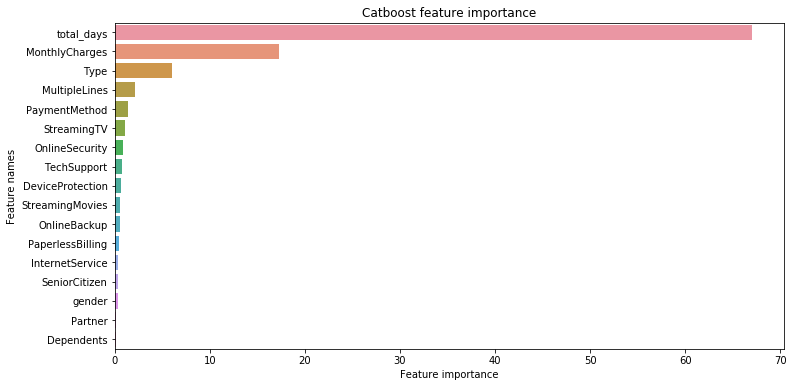

In [89]:
data = {'feature_names':np.array(features_train.columns),
        'feature_importance':np.array(model.get_feature_importance())}
data = pd.DataFrame(data)
data.sort_values(by=['feature_importance'], ascending=False, inplace=True)
plt.figure(figsize=(12,6))
sns.barplot(x=data['feature_importance'], y=data['feature_names'])
plt.title('Catboost feature importance')
plt.xlabel('Feature importance')
plt.ylabel('Feature names')
plt.show()

Скорректируем признаки согласно графику:

In [90]:
features_train = features_train.drop(['PaperlessBilling',
                                      'gender',
                                      'SeniorCitizen',
                                      'Partner',
                                      'Dependents',
                                      'InternetService',
                                      'OnlineSecurity',
                                      'OnlineBackup',
                                      'DeviceProtection',
                                      'TechSupport',
                                      'StreamingTV',
                                      'StreamingMovies'], axis=1)

In [91]:
features_valid = features_valid.drop(['PaperlessBilling',
                                      'gender',
                                      'SeniorCitizen',
                                      'Partner',
                                      'Dependents',
                                      'InternetService',
                                      'OnlineSecurity',
                                      'OnlineBackup',
                                      'DeviceProtection',
                                      'TechSupport',
                                      'StreamingTV',
                                      'StreamingMovies'], axis=1)

In [92]:
features_test = features_test.drop(['PaperlessBilling',
                                    'gender',
                                    'SeniorCitizen',
                                    'Partner',
                                    'Dependents',
                                    'InternetService',
                                    'OnlineSecurity',
                                    'OnlineBackup',
                                    'DeviceProtection',
                                    'TechSupport',
                                    'StreamingTV',
                                    'StreamingMovies'], axis=1)

In [93]:
cat_features = ['Type', 'PaymentMethod', 'MultipleLines']

Заново инициализируем модель, т.к. изменились категориальные признаки:

In [94]:
model = CatBoostClassifier(loss_function='Logloss', random_seed=42, cat_features=cat_features) 

In [95]:
grid = {'iterations' : [100, 150, 300, 500, 1000],
         'learning_rate' : [0.03, 0.1, 0.5, 1],
         'depth' : [2, 4, 6, 10]}

In [96]:
%%time
result = model.grid_search(grid, X=features_train, y=target_train, cv=5, verbose=10)

0:	loss: 0.4148862	best: 0.4148862 (0)	total: 2.5s	remaining: 3m 17s
10:	loss: 0.3001678	best: 0.2897152 (7)	total: 31.1s	remaining: 3m 15s
20:	loss: 0.4054546	best: 0.2705717 (18)	total: 2m 21s	remaining: 6m 36s
30:	loss: 0.2965784	best: 0.2705717 (18)	total: 3m 12s	remaining: 5m 4s
40:	loss: 0.4024048	best: 0.2705717 (18)	total: 6m 23s	remaining: 6m 4s
50:	loss: 0.3304245	best: 0.2705717 (18)	total: 7m 22s	remaining: 4m 11s
60:	loss: 0.3997001	best: 0.2705717 (18)	total: 11m 57s	remaining: 3m 43s
70:	loss: 0.3805406	best: 0.2705717 (18)	total: 13m 45s	remaining: 1m 44s
79:	loss: 0.3989483	best: 0.2705717 (18)	total: 22m 33s	remaining: 0us
Estimating final quality...
CPU times: user 20min 24s, sys: 3min 53s, total: 24min 17s
Wall time: 25min 54s


In [97]:
model.get_params()

{'loss_function': 'Logloss',
 'random_seed': 42,
 'cat_features': ['Type', 'PaymentMethod', 'MultipleLines'],
 'depth': 2,
 'iterations': 1000,
 'learning_rate': 0.5}

Посмотрим метрики на валидационной выборке:

In [98]:
roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])

0.93377121599628

In [99]:
print(classification_report(target_valid, model.predict(features_valid)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1035
           1       0.87      0.73      0.79       374

    accuracy                           0.90      1409
   macro avg       0.89      0.85      0.86      1409
weighted avg       0.90      0.90      0.90      1409



Объединим тренировочную и валидационную выборки, чтобы не терять часть обучающих данных:

In [100]:
features_train = pd.concat([features_train, features_valid])

In [101]:
target_train = pd.concat([target_train, target_valid])

Перемешаем данные:

In [102]:
features_train, target_train = shuffle(features_train, target_train, random_state=42)

Проверим размеры и баланс классов:

In [103]:
features_train.shape, target_train.shape

((5634, 5), (5634,))

In [104]:
target_train.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: target, dtype: float64

Обучим модель на объединенных данных:

In [105]:
model.fit(features_train, target_train, verbose=100)

0:	learn: 0.5268292	total: 6.88ms	remaining: 6.88s
100:	learn: 0.2964695	total: 2s	remaining: 17.8s
200:	learn: 0.2471336	total: 3.94s	remaining: 15.6s
300:	learn: 0.2223599	total: 5.78s	remaining: 13.4s
400:	learn: 0.2116644	total: 7.63s	remaining: 11.4s
500:	learn: 0.2018751	total: 9.42s	remaining: 9.38s
600:	learn: 0.1955624	total: 11.3s	remaining: 7.53s
700:	learn: 0.1892494	total: 13.4s	remaining: 5.71s
800:	learn: 0.1847892	total: 15.4s	remaining: 3.83s
900:	learn: 0.1811895	total: 17.3s	remaining: 1.9s
999:	learn: 0.1778669	total: 19.2s	remaining: 0us


**Вывод:**

Наболее значимыми признаками явялются:    
* срок "жизни" клиента
* ежемесячный платёж по тарифу
* тип оплаты (ежемесячная/договор на 1-2 года)
* подключение телефонного аппарата к нескольким линиям одновременно
* способ расчёта
     
Оптимальные гиперпараметры модели с учетом наболее важных признаков:
* 'depth': 2
* 'iterations': 1000
* 'learning_rate': 0.5

Итоговая модель обучена на объединенном наборе данных обучающий + валидационный, для того чтобы не терять часть обучающих данных.

# Тестирование модели

Рассчитаем итоговую AUC-ROC:

In [106]:
roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])

0.9407385879252887

Рассчитаем доли положительных ответов и пороги:

In [107]:
fpr, tpr, tresholds = roc_curve(target_test, model.predict_proba(features_test)[:, 1])

Посмотрим ROC-кривую на графике:

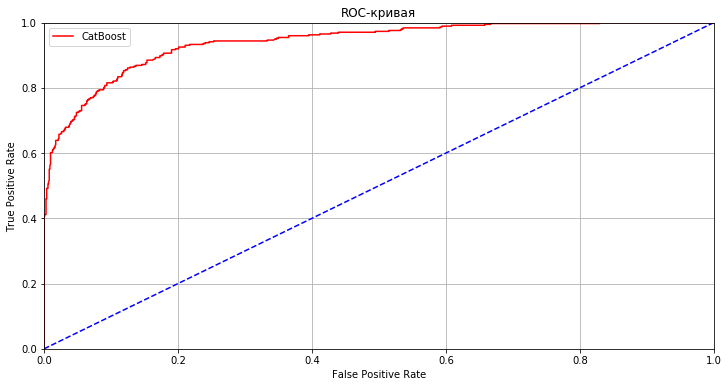

In [108]:
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color='red', label='CatBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Рассчитаем итоговые метрики:

In [109]:
print(classification_report(target_test, model.predict(features_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1035
           1       0.87      0.68      0.76       374

    accuracy                           0.89      1409
   macro avg       0.88      0.82      0.84      1409
weighted avg       0.89      0.89      0.88      1409



Сравним с константной моделью:

In [110]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)
accuracy_score(target_test, dummy.predict(features_test))

0.7345635202271115

**Вывод:**

Итоговые метрики на тесте:
* AUC-ROC 0.94
* accuracy 0.89
* precision 0.87
* recall 0.68
     
Модель проверена на адекватность с помощью константной модели, точность константной модели равна доле большего класса.

Задача бизнеса - прогнозирование оттока клиентов - выполнена. Модель работает с высокой точностью, т.е. предсказанным уходящим клиентам можно с уверенностью предлагать специальные условия.